La forêt aléatoire est une méthode d’ensemble. En résumé, le modèle crée un nombre X
d’arbres de décision, en utilisant à chaque fois un échantillon des données. Pour chaque
ensemble de données, il y a une sélection aléatoire de variables explicatives. Ensuite, toutes
les prédictions sont stockées pour chaque observation d’origine et finalement la prédiction
finale que conclura la forêt aléatoire sera la prédiction ayant été obtenue le plus souvent
par les arbres. Les méthodes d’ensembles, tels que les forêts aléatoires, donnent souvent
de meilleurs résultats et sont plus stables. Cependant, leur point négatif est qu’il n’est plus
possible de les visualiser. Pour les forêts aléatoires de type classification, la variable cible
est divisée en classe. Pour les forêts de type régression, il s’agit d’une variable cible continue.

Un arbre de décision est composé de :
* Un nœud racine par lequel les données entrent.
* Des nœuds de décision représentant un classement de questions et de réponses qui conditionnent la question suivante.
* Des branches qui connectent entre les nœuds et pouvant être orientées. Dans ce cas l’un des nœuds de la connexion est appelé nœud parent et l’autre nœud enfant.

Remarque :
* Les nœuds peuvent être connectés à un seul nœud parent, saut pour le nœud racine qui n’en a aucun.
* Un nœud qui n’a aucun nœud enfant est appelé nœud feuille ou simplement feuille.

Un chemin cependant est le parcours à partir du nœud racine jusqu’à un nœud feuille.

# Importer les librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importer les data

In [2]:
df = pd.read_csv('car_evaluation.csv')

# L'analyse exploratoire des données

In [3]:
df.shape
    # Nous pouvons voir qu'il y a 1728 instances et 7 variables dans l'ensemble de données.

(1727, 7)

In [4]:
df.head()
    # Afficher les 5 premières lignes de l'ensemble de données

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names
     # Nous pouvons voir que l'ensemble de données n'a pas de noms de colonnes appropriés.

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()
    # prévisualisons à nouveau l'ensemble de données

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()
    # Afficher le résumé de l'ensemble de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    
    print(df[col].value_counts())
    
    # Distribution de fréquence des valeurs dans les variables
    # Nous pouvons voir que les portes et les personnes sont de nature catégorique. 
    # Je vais donc les traiter comme des variables catégorielles. 
    

med      432
low      432
high     432
vhigh    431
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    431
Name: maint, dtype: int64
3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Résumé des variables
* Il y a 7 variables dans l'ensemble de données. Toutes les variables sont de type de données catégorielles.
* la classe est la variable cible.

In [9]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
df.isnull().sum()
     # vérifier les valeurs manquantes dans les variables

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Déclarer le vecteur de caractéristiques et la variable cible

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

# Diviser les données en un ensemble d'entraînement et de test distinct

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    # diviser les données en ensembles d'entraînement et de test

In [13]:
X_train.shape, X_test.shape
    # vérifier la forme de X_train et X_test

((1157, 6), (570, 6))

# Ingénierie des fonctionnalités

L'ingénierie des fonctionnalités est le processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter son pouvoir prédictif. J'effectuerai de l'ingénierie de fonctionnalités sur différents types de variables.

In [14]:
# Tout d'abord, je vais vérifier à nouveau les types de données des variables.
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
# Maintenant, je vais encoder les variables catégorielles.
X_train.head()

# Nous pouvons voir que toutes les variables sont de type de données catégorielles ordinales.

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [16]:
# import category encoders
import category_encoders as ce

In [18]:
# encode les variables catégorielles avec un encodage ordinal
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


Nous avons maintenant un ensemble de formation et de test prêt pour la construction de modèles.

# Modèle Random Forest Classifier avec paramètres par défaut

In [21]:
# importer le classificateur de forêt aléatoire 
from sklearn.ensemble import RandomForestClassifier

In [22]:
# instancier le classificateur
rfc = RandomForestClassifier(random_state=0)

In [23]:
# adapter le modèle
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
#Prédire les résultats de l'ensemble de test
y_pred = rfc.predict(X_test)

In [25]:
# Vérifier le score de précision
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


Ici, y_test sont les vraies étiquettes de classe et y_pred sont les étiquettes de classe prédites dans l'ensemble de test.

Ici, j'ai construit le modèle Random Forest Classifier avec le paramètre par défaut n_estimators = 10. J'ai donc utilisé 10 arbres de décision pour construire le modèle. Maintenant, je vais augmenter le nombre d'arbres de décision et voir son effet sur la précision.

# Modèle Random Forest Classifier avec le paramètre n_estimators=100

In [26]:
# instancie le classifieur avec n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

In [27]:
# adapter le modèle à l'ensemble d'entraînement
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
# Prédire sur les résultats de l'ensemble de test
y_pred_100 = rfc_100.predict(X_test)

In [29]:
# Vérifier le score de précision
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


Le score de précision du modèle avec 10 arbres de décision est de 0,9247 mais le même avec 100 arbres de décision est de 0,9457. Ainsi, la précision attendue augmente avec le nombre d'arbres de décision dans le modèle.

# Trouvez des fonctionnalités importantes avec le modèle Random Forest

Jusqu'à présent, j'ai utilisé toutes les fonctionnalités données dans le modèle. Maintenant, je vais sélectionner uniquement les caractéristiques importantes, construire le modèle à l'aide de ces caractéristiques et voir son effet sur la précision.

Tout d'abord, je vais créer le modèle de forêt aléatoire comme suit :

In [30]:
# crée le classifieur avec n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [31]:
# adapter le modèle à l'ensemble d'entraînement
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Maintenant, je vais utiliser la variable d'importance des fonctionnalités pour voir les scores d'importance des fonctionnalités. 

In [32]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

Nous pouvons voir que la caractéristique la plus importante est la sécurité et la caractéristique la moins importante est les portes.

# Visualiser les scores des fonctionnalités des fonctionnalités

In [ ]:
Maintenant, je vais visualiser les scores des fonctionnalités avec matplotlib et seaborn.

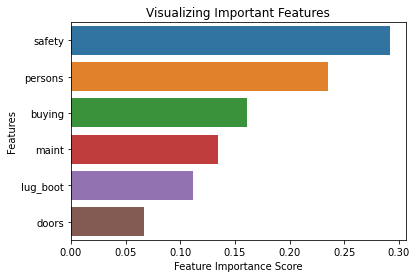

In [33]:
# Création d'un bar plot marin 
sns.barplot(x=feature_scores, y=feature_scores.index)

# Ajouter des étiquettes au graphique
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

# Construire un modèle de forêt aléatoire sur des fonctionnalités sélectionnées

Maintenant, je vais supprimer les portes de fonction les moins importantes du modèle, reconstruire le modèle et vérifier son effet sur la précision.

In [34]:
# déclarer le vecteur caractéristique et la variable cible
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
Maintenant, je vais construire le modèle de forêt aléatoire et vérifier l'exactitude.

In [35]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [36]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)

In [37]:
# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9649


J'ai supprimé la variable portes du modèle, je l'ai reconstruit et j'ai vérifié son exactitude. La précision du modèle avec porte variable supprimée est de 0,9264. La précision du modèle avec toutes les variables prises en compte est de 0,9247. Ainsi, nous pouvons voir que la précision du modèle a été améliorée avec la variable portes supprimée du modèle.

De plus, le deuxième modèle le moins important est lug_boot. Si je le supprime du modèle et reconstruis le modèle, la précision est alors de 0,8546. C'est une baisse significative de la précision. Donc, je ne le laisserai pas tomber du modèle.

Maintenant, sur la base de l'analyse ci-dessus, nous pouvons conclure que la précision de notre modèle de classification est très bonne. Notre modèle fait un très bon travail en termes de prédiction des étiquettes de classe.

Mais, il ne donne pas la distribution sous-jacente des valeurs. De plus, cela ne dit rien sur le type d'erreurs que fait notre classificateur.

Nous avons un autre outil appelé matrice de confusion qui vient à notre secours.

# Matrice de confusion

Une matrice de confusion est un outil permettant de résumer les performances d'un algorithme de classification. Une matrice de confusion nous donnera une image claire des performances du modèle de classification et des types d'erreurs produites par le modèle. Il nous donne un résumé des prédictions correctes et incorrectes ventilées par catégorie. Le résumé est représenté sous forme de tableau.

Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification. Ces quatre résultats sont décrits ci-dessous :

Vrais positifs (TP) - Les vrais positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe et que l'observation appartient en fait à cette classe.

Vrais négatifs (TN) – Les vrais négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe et que l'observation n'appartient en fait pas à cette classe.

Faux positifs (FP) - Les faux positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe mais que l'observation n'appartient pas à cette classe. Ce type d'erreur est appelé erreur de type I.

Faux négatifs (FN) - Les faux négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe mais que l'observation appartient en fait à cette classe. Il s'agit d'une erreur très grave et elle est appelée erreur de type II.

In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]


# Rapport de classement

Le rapport de classification est un autre moyen d'évaluer les performances du modèle de classification. Il affiche les scores de précision, de rappel, de f1 et de support pour le modèle. J'ai décrit ces termes plus loin.

Nous pouvons imprimer un rapport de classification comme suit : -

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570



# Résultats et conclusion

Dans ce projet, je construis un classificateur de forêt aléatoire pour prédire la sécurité de la voiture. Je construis deux modèles, un avec 10 arbres de décision et un autre avec 100 arbres de décision.
Le score de précision du modèle avec 10 arbres de décision est de 0,9247 mais le même avec 100 arbres de décision est de 0,9457. Ainsi, la précision attendue augmente avec le nombre d'arbres de décision dans le modèle.
J'ai utilisé le modèle Random Forest pour trouver uniquement les caractéristiques importantes, construire le modèle en utilisant ces caractéristiques et voir son effet sur la précision. La caractéristique la plus importante est la sécurité et la caractéristique la moins importante est les portes.
J'ai supprimé la variable portes du modèle, je l'ai reconstruit et j'ai vérifié son exactitude. La précision du modèle avec porte variable supprimée est de 0,9264. La précision du modèle avec toutes les variables prises en compte est de 0,9247. Ainsi, nous pouvons voir que la précision du modèle a été améliorée avec la variable portes supprimée du modèle.
Le deuxième modèle le moins important est lug_boot. Si je le supprime du modèle et reconstruis le modèle, la précision est alors de 0,8546. C'est une baisse significative de la précision. Donc, je ne le laisserai pas tomber du modèle.
La matrice de confusion et le rapport de classification sont un autre outil pour visualiser les performances du modèle. Ils donnent de bonnes performances.